# Свойства оценок. Задача 3

__Ильичёв А.С., 693__

In [2]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Придумаем распределение, у которого конечны первые четыре момента, а пятый - нет, и сгенерируем выборку $X_1, \dots, X_N$ из этого распределения для $N=10^4$.

Примером такого распределения является $\mathrm{Pareto}(\gamma)$ с плотностью $p(x) = \frac\gamma{x^{\gamma + 1}}I(x>1)$. Так как интеграл $\int_1^{\infty}\frac{\gamma x^k}{x^{\gamma + 1}} dx$ сходится при $\gamma > k$ (и в этом случае равен $\frac{\gamma}{\gamma - k}$), для выполнения условия можно взять $\gamma = 5$.

In [3]:
N = 10 ** 4
gamma = 5
ns = np.arange(1, N + 1)
pareto_distr = sts.pareto(gamma)
sample_par = pareto_distr.rvs(size=N)

#### 2. Построим график плотности распределения и нанесем точки выборки на график.

In [4]:
def make_pdf(distr, sample, title, lim):
    plt.figure(figsize=(15,5))
    x = np.linspace(lim[0], lim[1], 1000)
    y = distr.pdf(x)
    plt.plot(x, y)
    plt.scatter(sample, np.zeros(len(sample)), alpha=0.2, c='green')
    plt.title(title)
    plt.xlim(lim[0] - 0.1, lim[1]) # небольшой отступ для красоты
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p(x)$')
    plt.show()

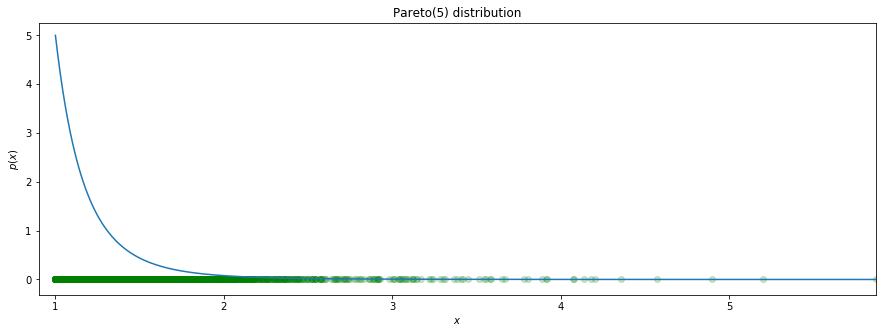

In [5]:
make_pdf(pareto_distr, sample_par, 'Pareto(5) distribution', (1, np.max(sample_par)))

#### 3. Для всех $n \le N$ посчитаем оценку $s^2 = s^2(X_1, \dots, X_n)$ для дисперсии.

In [6]:
s2_par = np.array([(sample_par[:i]**2).mean() -
                   (sample_par[:i].mean())**2 for i in ns])

Найдем истинное значение дисперсии.
$$ \mathrm{D_p}X_1 = \mathrm{E}X_1^2 - (\mathrm{E}X_1)^2 = \frac53 - \left(\frac54\right)^2 = \frac5{48} \nonumber$$

In [7]:
true_var_par = 5/48

#### 4. Построим график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

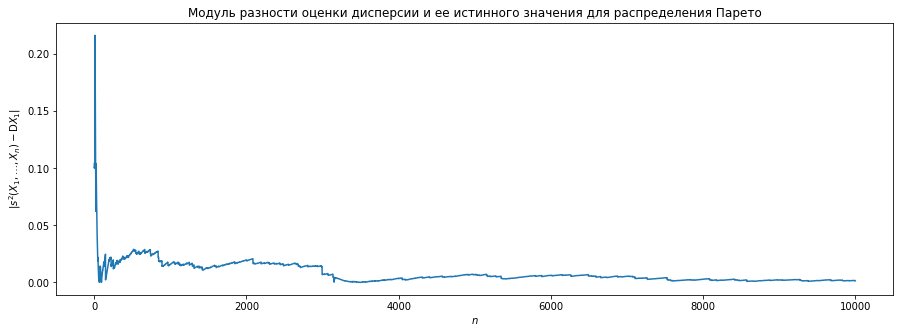

In [8]:
plt.figure(figsize=(15,5))
plt.plot(ns, np.abs(s2_par - true_var_par))
plt.title('Модуль разности оценки дисперсии и ее\ 
          истинного значения для распределения Парето')
plt.xlabel(r'$n$')
plt.ylabel(r'$|s^2(X_1, \dots, X_n) - \mathrm{D}X_1|$')
plt.show()

#### 5. Проведем аналогичное исследование для выборки из распределения Коши.

Сгенерируем стандартное распределение Коши.

In [9]:
cauchy_distr = sts.cauchy()
sample_cau = cauchy_distr.rvs(size=N)

Построим график плотности (для наглядности ограничим диапазон значений $x$).

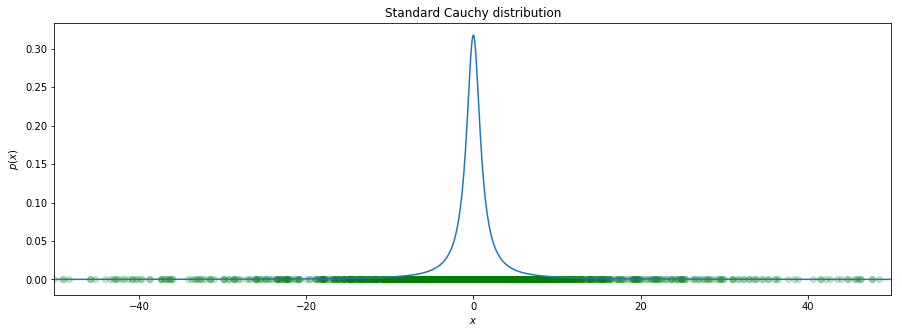

In [10]:
make_pdf(cauchy_distr, sample_cau, 'Standard Cauchy distribution', (-50, 50))

Найдем выборочную дисперсию и построим ее график.

In [11]:
s2_cau = np.array([(sample_cau[:i]**2).mean() - 
                   (sample_cau[:i].mean())**2 for i in ns])

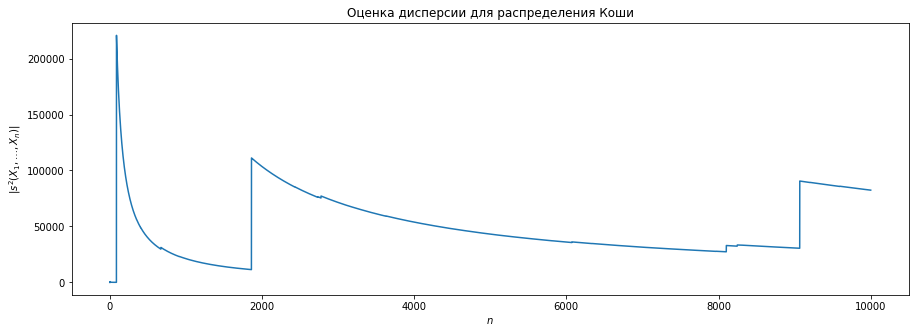

In [12]:
plt.figure(figsize=(15,5))
plt.plot(ns, s2_cau)
plt.title('Оценка дисперсии для распределения Коши')
plt.xlabel(r'$n$')
plt.ylabel(r'$|s^2(X_1, \dots, X_n)|$')
plt.show()

#### 5. Сделаем выводы. 

Для распределения Парето модуль разности оценки дисперсии на графике стремится к нулю при увеличении $n$. Это следует из теоретической задачи 4 (такая оценка является состоятельной). Оценка дисперсии для распределения Коши расходится, потому что у этого распределения не существует моментов. "Скачки" увеличения дисперсии на графике связаны с появлением в выборке больших по модулю значений.